In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

A good [resource](https://towardsdatascience.com/how-to-crush-your-data-take-home-interview-a0b9f7c97d6). 

When you're done, create a brief presentation: 
- Introduce problem
- Overview of process 
- Highlight key results 
- Recommendations / Conclusions / Future Work 

# Univariate Classification using Logistic Regression 


## Create Data

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

## Create Model 

In [4]:
# Create an instance of LogisticRegression and bind it to `model` variable 
model = LogisticRegression(solver='liblinear', random_state=0)

In [5]:
# Fit (train) model 
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [9]:
# See the array of distinct values that y can take
print(model.classes_)
# intercept
print(model.intercept_)
# slope 
print(model.coef_)

[0 1]
[-1.04608067]
[[0.51491375]]


In [10]:
# Check the model's performance with `.predict_proba(x)
# Returns the matrix of probabilities that the predicted output is equal to zero or one 
model.predict_proba(x)
# Each row corresponds to a single observation 
# The 1st column is the probability that the predicted output is zero : 1-p(x)
# The 2nd column is the probability that the predicted output is one  : p(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [11]:
# Return the predicted outputs as a 1D array 
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [12]:
# determine the accuracy of the model
# correct guesses/ all guesses 
# model.score(x_train, y_train)
model.score(x,y)

0.9

In [13]:
# `confusion_matrix` provides more information on model accuracy 
# True negatives in the upper-left position
# False negatives in the lower-left position
# False positives in the upper-right position
# True positives in the lower-right position
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

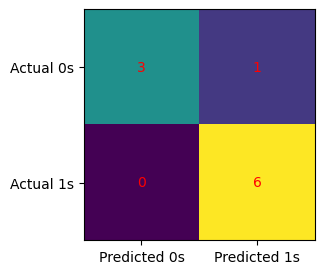

In [15]:
# plotting the confusion_matrix
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()